<center>
    <img src="https://i.ibb.co.com/m5hwhf2/HDC-Anca.png" width="300">
    <h1><b>Loan Risk Assesment - by Heptad Data Collector</b></h1>
</center>

**Members of Heptad Data Collector**

1. Farah Fitria Sari
2. Aditya Fajri Melinianto
3. Apri Ansyah
5. Oktafina Pingkan Purwanto
6. Pancaran Ratna Mustika
7. Ryan Fajar
8. Tiara Lailatul Nikmah

- **Tools**

![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)
![Featuring](https://img.shields.io/badge/Using-Python-blue?style=for-the-badge&logo=python)

- **Dataset**

Large and rich dataset from the U.S. Small Business Administration (SBA): [Should This Loan be Approved or Denied?](https://www.kaggle.com/datasets/mirbektoktogaraev/should-this-loan-be-approved-or-denied "Should This Loan be Approved or Denied?")

# Business Understanding

## Latar Belakang

<center>
    <img src="https://www.sba.gov/themes/custom/sba/dist/img/social/SBASEOImage.jpg" width="700">
</center>

U.S. Small Business Administration (SBA) didirikan pada tahun 1953, dengan tujuan untuk mendukung usaha kecil di pasar kredit Amerika dalam ``mengurangi pengangguran dan menciptakan lapangan kerja``. Salah satu cara SBA membantu usaha kecil adalah ``melalui program jaminan pinjaman untuk mendorong bank memberikan kredit kepada usaha kecil``. Jika peminjam gagal bayar, maka SBA akan menanggung sebagian dari pinjaman. Meskipun SBA bertindak untuk mengurangi resiko bank dengan cara membayar sebagian jumlah kerugian bank sesuai dengan yang telah dijaminkan diawal, kejadian gagal bayar (loan default) menimbulkan pertanyaan tentang efektivitas inisiatif tersebut dan dampaknya terhadap stabilitas keuangan bank dan ekonomi.


## Problem Statement

SBA sebagai lembaga penjamin untuk bank bagi para UMKM ingin ``menurunkan loan default rate`` dari usaha-usaha yang mereka loloskan / jaminkan.
    

## Roles

Sebagai sekelompok tim data scientist, tim Heptad Data Collector diminta untuk melakukan analisa dan membuat model yang bisa memprediksi apakah pinjaman ini bisa diterima/tidak berdasarkan dataset yang dimiliki oleh perusahaan Small Business Administration Amerika Serikat (SBA).

Selain itu, tim Heptad Data Collector juga diminta untuk mempresentasikan solusi mereka terhadap client, yaitu SBA itu sendiri. Solusi tersebut bisa berupa rekomendasi bisnis, dampak bisnis (business impact), atau simulasi bisnis (business simulation):

* PIC Data Cleansing: ``Tiara Lailatul Nikmah``
* PIC Feature Engineering: ``Ryan Fajar``
* PIC Data Exploration: ``Oktafina Pingkan Purwanto``
* PIC EDA: ``Apri Ansyah``
* PIC Insights and Visualization: ``Farah Fitria Sari``
* PIC Modelling and Evaluation: ``Aditya Fajri Melinianto``

## Goals

Mengembangkan data driven decision making system yang ``robust``, memanfaatkan data demografis perusahaan untuk menilai ``kelayakan pinjaman`` UMKM dengan akurat.


## Objectives
1. Data preprocessing & cleansing
2. Identifikasi potensi resiko dengan EDA, dengan visualisasi
3. Membuat model machine learning
4. Menentukan metrics evaluation yang tepat
5. Monitoring & reporting (mentranslate hasil pemodelan dan evaluasi ke dalam ranah bisnis).

## Business Metrics
<img src="https://i.ibb.co.com/pXXGy6X/2024-05-16-18-23-14-Stage-0-PT-Heptad-Data-Collector-Kelompok-4-DS-Batch-43-pptx-Google-Slide.png">

# **Stage 1A Data Pre-Processing**

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


from datetime import datetime

from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import zscore
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [ ]:
source = 'SBAnational.csv'
df = pd.read_csv(source)
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


## Data Understanding

In [ ]:
print("Dimensi data :", df.shape)
print("Jumlah baris :", df.shape[0])
print("Jumlah kolom :", df.shape[1])

Dimensi data : (899164, 27)
Jumlah baris : 899164
Jumlah kolom : 27


In [ ]:
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [ ]:
# basic info tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

Dari info diatas, bisa didapatkan informasi sebagai berikut

* Dataset memiliki 27 columns dan 899164 rows data
* Terdapat 3 jenis tipe data yaitu : int64, object, float64
* Cukup banyak kolom yang memiliki missing values, terutama pada ChgOffDate

Pertimbangan pada saat data pre-processing

* Menghapus kolom ChgOffDate karena terlalu banyak missing value
* Menggunakan metode imputation untuk menangani missing value yang lain

## A. Handling Missing Value

In [ ]:
# jumlah entry NULL di setiap kolom
df.isna().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [ ]:
print('Missing values status:', df.isnull().values.any())
missing_percentage = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
missing_percentage['Percentage'] = (missing_percentage['Total Null Values']/df.shape[0])*100
missing_percentage["Data Type"] = [df[col].dtype for col in df.columns]
missing_percentage.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
missing_percentage.style.background_gradient(cmap='Blues')

Missing values status: True


,Total Null Values,Percentage,Data Type
ChgOffDate,736465,81.905526,object
RevLineCr,4528,0.503579,object
LowDoc,2582,0.287156,object
DisbursementDate,2368,0.263356,object
MIS_Status,1997,0.222095,object
BankState,1566,0.174162,object
Bank,1559,0.173383,object
NewExist,136,0.015125,object
City,30,0.003336,object
State,14,0.001557,int64


- Kolom ChargeOffDate, ``Missing Value lebih dari 80%`` maka kolom dihapus

In [ ]:
df.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312759,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [ ]:
# Menghapus kolom ChgoffDate karena terlalu banyak missing value
df = df.drop(['ChgOffDate'], axis=1)

- Menghapus baris data jika terdapat missing value pada kolom ``target yaitu MIS_Status``
- Setelah itu, untuk kolom lain yang memiliki NaN seperti kolom ``Name, City, State, Bank, BankState, NewExist, RevLineCr, LowDoc, DisbursementDate,`` Missing Value hanya dibawah 0,5%, maka hanya dihapus baris yang mengandung NaN

In [ ]:
# Menghapus baris jika terdapat missing value pada kolom MIS_Status
df.dropna(subset=['MIS_Status'], inplace=True)

In [ ]:
df.dropna(subset=['Name', 'City', 'State', 'Bank', 'BankState', 'NewExist', 'RevLineCr', 'LowDoc', 'DisbursementDate'], inplace=True)

## B. Handle duplicate data

In [ ]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns.values)).head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv


In [ ]:
df.duplicated().value_counts()

False    886240
Name: count, dtype: int64

Dari info diatas, bisa didapatkan informasi sebagai berikut
* **Tidak ada data yang duplikat**

## C. Feature Transformation

1. Mengubah kolom ``object`` ke ``numerik`` (DisbursementGross, BalanceGross, GrAppv, SBA_Appv) diganti ke float
2. Menghilangkan ``nilai 0`` pada: NAICS (memasukan ke kategori 81), Term & NoEmp (diganti dengan nilai median), NewExist & UrbanRural (diganti dengan nilai modus)
3. Menghilangkan nilai ``bukan Y atau N`` pada kolom LowDoc dan RevLineCr (diganti dengan nilai modus (N))
4. Menghilangkan ``3 karakter terakhir`` pada kolom NAICS
5. Mengganti ``0 dan 1`` pada kolom FranchiseCode menjadi ``Not-Franchise`` dan selain itu menjadi ``Franchise``
6. Mengganti Nilai ``1976A`` pada kolom ApprovalFY diganti menjadi ``1976``
7. Untuk Bank dengan ``count < 1500`` akan dimasukkan ke kategori ‘Others’
8. NAICS diubah menjadi nama-nama industri setiap kategori ``0 sampai 92``
9. Term dikelompokkan menjadi 4 bagian ``(0-60 bulan, 60-120 bulan, 120-Upper IQR, dan > Upper IQR)``

### 1. Mengubah kolom object ke numerik (DisbursementGross, BalanceGross, GrAppv, SBA_Appv) diganti ke float

- Karena kolom tersebut termasuk ``nominal angka``, maka akan dirubah terlebih dahulu ke tipe data ``float``
- Akan tetapi, nantinya fitur ini tidak akan digunakan karena tidak relevan untuk dijadikan prediktor

In [ ]:
#Merubah Kolom Currency menjadi float
curr_col = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
df[curr_col] = df[curr_col].replace('[\$,]', '', regex=True).astype(float)

### 2a. Menghilangkan nilai 0 pada: NAICS (memasukan ke kategori 81)

- NAICS merepresentasikan industri peminjam, disini akan memasukan industri yang memiliki nilai 0 yang ada pada dataset ke sektor others, yaitu kategori 81

In [ ]:
df['NAICS'].value_counts()

NAICS
0         198267
722110     27772
722211     19338
811111     14392
621210     13856
           ...  
331411         1
336414         1
311351         1
316212         1
514190         1
Name: count, Length: 1311, dtype: int64

In [ ]:
df['NAICS'] = df['NAICS'].replace({0: 81})
df.NAICS.value_counts()

NAICS
81        198267
722110     27772
722211     19338
811111     14392
621210     13856
           ...  
331411         1
336414         1
311351         1
316212         1
514190         1
Name: count, Length: 1311, dtype: int64

### 2b. Menghilangkan nilai 0 pada Term & NoEmp (diganti dengan nilai median)

- Term 0 akan di replace dengan median, karena angsuran tidak mungkin bernilai 0
- Sama halnya dengan NoEmp, nilai yang bernilai 0 akan diisi dengan nilai median

In [ ]:
df['Term'] = df['Term'].replace({0: df['Term'].median()})
df.Term.value_counts()

Term
84     226620
60      88507
240     84964
120     76712
300     44395
        ...  
396         1
438         1
382         1
367         1
429         1
Name: count, Length: 410, dtype: int64

In [ ]:
df['NoEmp'] = df['NoEmp'].replace({0: df['NoEmp'].median()})
df.NoEmp.value_counts()

NoEmp
1       151454
2       136321
3        89355
4        79141
5        59520
         ...  
660          1
4953         1
464          1
339          1
3713         1
Name: count, Length: 596, dtype: int64

### 2c. Menghilangkan nilai 0 pada NewExist & UrbanRural (diganti dengan nilai modus)

- Nilai 0 pada kolom NewExist akan digantikan dengan modus karena termasuk categorical feature

In [ ]:
df['NewExist'].mode()

0    1.0
Name: NewExist, dtype: float64

In [ ]:
df['NewExist'] = df['NewExist'].replace({0: 1})
df['NewExist'] = df['NewExist'].astype(int)
df.NewExist.value_counts()

NewExist
1    637160
2    249080
Name: count, dtype: int64

- Nilai 0 pada kolom UrbanRural juga akan digantikan dengan modus karena termasuk categorical feature

In [ ]:
df['UrbanRural'].mode()

0    1
Name: UrbanRural, dtype: int64

In [ ]:
df['UrbanRural'] = df['UrbanRural'].replace({0: 1})
df['UrbanRural'] = df['UrbanRural'].astype('int')
df.UrbanRural.value_counts()

UrbanRural
1    782165
2    104075
Name: count, dtype: int64

### 3. Menghilangkan nilai bukan Y atau N pada kolom LowDoc dan RevLineCr (diganti dengan nilai modus)

In [ ]:
df['LowDoc'] = np.where((df['LowDoc'] != 'N') & (df['LowDoc'] != 'Y'), 'N', df.LowDoc)
df.LowDoc.value_counts()

LowDoc
N    778346
Y    107894
Name: count, dtype: int64

In [ ]:
df['LowDoc'] = df.apply(lambda row: 1 if row['LowDoc'] == 'Y' else 0, axis=1)

In [ ]:
df['RevLineCr'] = np.where((df['RevLineCr'] != 'N') & (df['RevLineCr'] != 'Y'), 'N', df.RevLineCr)
df.RevLineCr.value_counts()

RevLineCr
N    687973
Y    198267
Name: count, dtype: int64

In [ ]:
df['RevLineCr'] = df.apply(lambda row: 1 if row['RevLineCr'] == 'Y' else 0, axis=1)

### 4. Menghilangkan 3 karakter terakhir pada kolom NAICS

In [ ]:
# Menangani kolom NAICS, kita akan meerubahnya menjadi nama sektornya dan membuat kolom rate default setiap sektornya
# Berdasarkan guideline, dua  digit di awal adalah kode industrinya

ind_code = df['NAICS']

#Fungsi untuk mengambil ambil 2 digit awal dari kodenya
def get_code(ind_code):
    if ind_code <= 0:
        return 0
    return (ind_code // 10 ** (int(math.log(ind_code, 10)) - 1))

In [ ]:
# Membuat kolom baru yaitu ind_code
df['ind_code'] = df.NAICS.apply(get_code)

In [ ]:
df['ind_code'].value_counts()

ind_code
81    270021
44     83867
72     67084
54     66951
23     65635
62     54633
42     48148
45     41895
33     37740
56     32114
48     19955
32     17709
71     14460
53     13457
31     11660
51     11220
52      9378
11      8868
61      6313
49      2180
21      1820
22       654
55       256
92       222
Name: count, dtype: int64

### 5. Mengganti 0 dan 1 pada kolom FranchiseCode menjadi Not-Franchise dan selain itu menjadi Franchise

In [ ]:
df.FranchiseCode.value_counts()

FranchiseCode
1        631412
0        203625
78760      3342
68020      1917
50564      1023
          ...  
83876         1
12545         1
68170         1
69145         1
15930         1
Name: count, Length: 2754, dtype: int64

In [ ]:
# Melihat kolom FranchiseCode, berdasarkan guideline
# Jika kolom FranchiseCode = 0 atau = 1 maka dia tidak ada frnachise, selain itu maka dia ada franchise

df['FranchiseCode'] = np.where((df.FranchiseCode != 0 ) & (df.FranchiseCode != 1 ),'Franchise','Not-Franchise')
# df['FranchiseCode'] = df['FranchiseCode'].replace('0.0', 'Not-Franchise')
# df['FranchiseCode'] = df['FranchiseCode'].replace('1.0', 'Not-Franchise')
df.FranchiseCode.value_counts()

FranchiseCode
Not-Franchise    835037
Franchise         51203
Name: count, dtype: int64

In [ ]:
df['FranchiseCode'] = df.apply(lambda row: 1 if row['FranchiseCode'] == 'Franchise' else 0, axis=1)

### 6. Mengganti Nilai 1976A pada kolom ApprovalFY diganti menjadi 1976

In [ ]:
#Merubah kolom ApprovalFY menjadi integer, walaupun sebenrnya dia adalah tahun, tapi agar lebih mudah
df['ApprovalFY'].replace('1976A', 1976, inplace=True)
df['ApprovalFY']= df['ApprovalFY'].astype(int)

### 7. Untuk Bank dengan count < 1500 akan dimasukkan ke kategori ‘Others’

Membuat variabel baru yang mengandung jumlah masing-masing kemunculan bank

In [ ]:
bank_counts = df['Bank'].value_counts()

In [ ]:
bank_counts

Bank
BANK OF AMERICA NATL ASSOC        86075
WELLS FARGO BANK NATL ASSOC       62934
JPMORGAN CHASE BANK NATL ASSOC    47460
U.S. BANK NATIONAL ASSOCIATION    34752
CITIZENS BANK NATL ASSOC          33569
                                  ...  
AMER BK & TR WISCONSIN                1
BANK OF IDAHO HOLDING COMPANY         1
APPLE CREEK BK. CO                    1
HERITAGE BK E. BAY A DIVISION         1
DEPCO                                 1
Name: count, Length: 5788, dtype: int64

Membuat variabel baru lagi untuk mengelompokkan bank yang hanya muncul kurang dari 1500x saja

In [ ]:
banks_to_replace = bank_counts[bank_counts < 1500].index

In [ ]:
df['Bank'] = df['Bank'].apply(lambda x: 'Others' if x in banks_to_replace else x)

Hasil setelah pengelompokkan bank

In [ ]:
df['Bank'].value_counts()

Bank
Others                            317633
BANK OF AMERICA NATL ASSOC         86075
WELLS FARGO BANK NATL ASSOC        62934
JPMORGAN CHASE BANK NATL ASSOC     47460
U.S. BANK NATIONAL ASSOCIATION     34752
CITIZENS BANK NATL ASSOC           33569
PNC BANK, NATIONAL ASSOCIATION     27148
BBCN BANK                          22814
CAPITAL ONE NATL ASSOC             22220
MANUFACTURERS & TRADERS TR CO      11150
READYCAP LENDING, LLC              10616
THE HUNTINGTON NATIONAL BANK        9520
KEYBANK NATIONAL ASSOCIATION        9186
TD BANK, NATIONAL ASSOCIATION       8901
BRANCH BK. & TR CO                  8028
ZIONS FIRST NATIONAL BANK           7897
CALIFORNIA BANK & TRUST             7476
CITIBANK, N.A.                      7402
REGIONS BANK                        7143
BANCO POPULAR NORTH AMERICA         7135
COMERICA BANK                       6991
BANK OF THE WEST                    6628
COMPASS BANK                        6384
BUSINESS LOAN CENTER, LLC           6262
GE CAP. SMA

### 8. NAICS diubah menjadi nama-nama industri setiap kategori 0 sampai 92

In [ ]:
#Merubah 2 digit menjadi nama sektor
def industri(i):
    def_code = {11:'Agriculture, Forestry, Fishing & Hunting', 21:'Mining, Quarying, Oil & Gas',
                22:'Utilities', 23:'Constuction', 31:'Manufacturing', 32:'Manufacturing', 33:'Manufacturing',
                42:'Wholesale Trade', 44:'Retail Trade', 45:'Retail Trade', 48:'Transportation & Warehousing',
                49:'Transportation & Warehousing', 51:'Information', 52:'Finance & Insurance',
                53:'Real Estate, Rental & Leasing', 54:'Professional, Scientific & Technical Service',
                55:'Management of Companies & Enterprise',
                56:'Administrative, Support, Waste Management & Remediation Service',
                61:'Educational Service', 62:'Health Care & Social Assistance',
                71:'Arts, Entertainment & Recreation', 72:'Accomodation & Food Service',
                81:'Other Servieces (Ex: Public Administration)', 92:'Public Administration'
               }
    if i in def_code:
        return def_code[i]

In [ ]:
df['Industri'] = df.ind_code.apply(industri)
df['Industri'].value_counts()

Industri
Other Servieces (Ex: Public Administration)                        270021
Retail Trade                                                       125762
Manufacturing                                                       67109
Accomodation & Food Service                                         67084
Professional, Scientific & Technical Service                        66951
Constuction                                                         65635
Health Care & Social Assistance                                     54633
Wholesale Trade                                                     48148
Administrative, Support, Waste Management & Remediation Service     32114
Transportation & Warehousing                                        22135
Arts, Entertainment & Recreation                                    14460
Real Estate, Rental & Leasing                                       13457
Information                                                         11220
Finance & Insurance          

Setelah dikelompokan dengan masinng-masing industrinya, maka selanjutnya akan dilakukan label encoding pada bagian Stage 1B setelah Stage 2 EDA.

### 9. Term dikelompokkan menjadi 4 bagian (0-60 bulan, 60-120 bulan, 120-Upper IQR, dan > Upper IQR)

In [ ]:
#Menentukan Upper IQR Term
Q1 = df['Term'].quantile(0.25)
Q3 = df['Term'].quantile(0.75)
IQR = Q3 - Q1

upper_IQR = Q3 + 1.5 * IQR
upper_IQR

210.0

In [ ]:
#Mengelompokkan menjadi 4 bagian
bins = [0, 60, 120, upper_IQR, float('inf')]
labels = ['0 to 60', '60 to 120', f'120 to {upper_IQR}', f'more than {upper_IQR}']
df['Term'] = pd.cut(df['Term'], bins=bins, labels=labels, right=False, include_lowest=True)
print(df[['Term']])

                   Term
0             60 to 120
1             60 to 120
2          120 to 210.0
3             60 to 120
4       more than 210.0
...                 ...
899159        60 to 120
899160        60 to 120
899161        60 to 120
899162        60 to 120
899163          0 to 60

[886240 rows x 1 columns]


# **Stage 1C Feature Engineering**

## A. Feature Selection

Sebagai fitur target, ``MIS_status`` akan dilakukan label encoding ``ChargeOff = 1``, ``PIF=0`` terlebih dahulu sebelum dicek korelasinya terhadap fitur numerikal lain.

In [ ]:
df['MIS_Status'] = df['MIS_Status'].replace({'P I F': 0, 'CHGOFF':1}).astype(int)
df.MIS_Status.value_counts()

MIS_Status
0    730199
1    156041
Name: count, dtype: int64

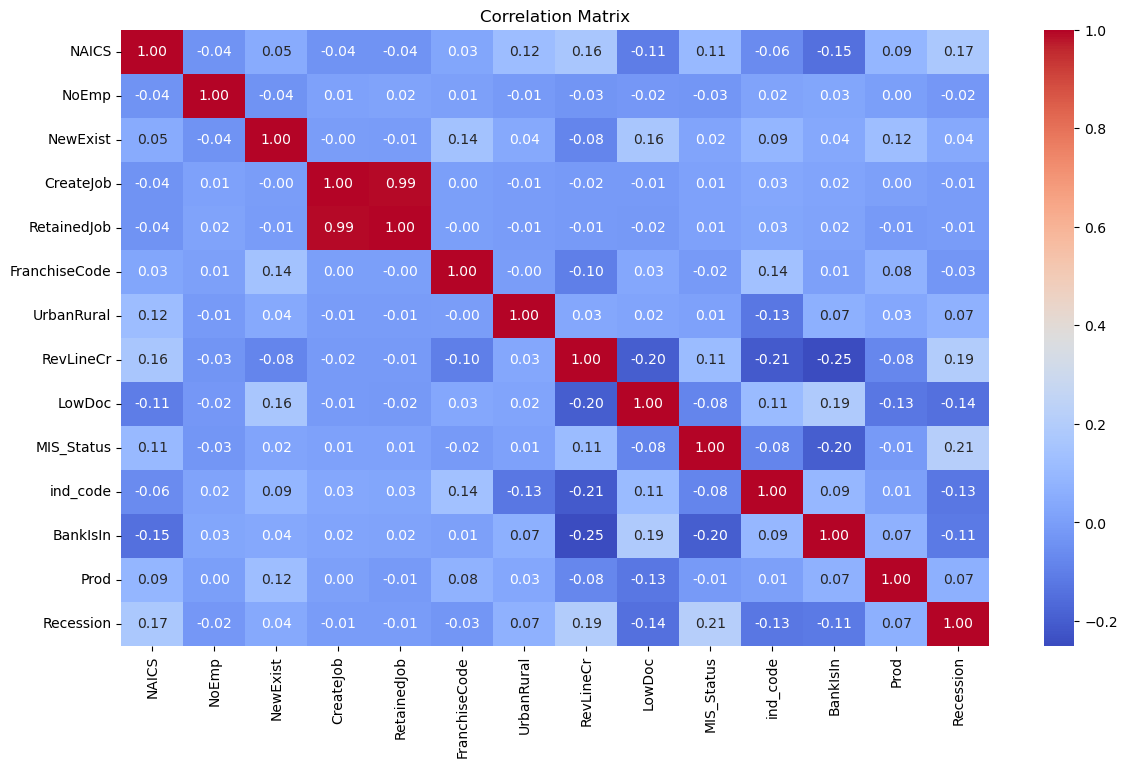

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(14, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### 1. Berdasarkan heatmap correlation diatas, berikut adalah fitur yang kami putuskan untuk pertahankan beserta dengan penjelasannya

1. ``Term`` : Merupakan jumlah angsuran yang diberikan kepada peminjam (dalam bentuk bulan)
2. ``NoEmp`` : Jumlah karyawan yang terdapat pada UMKM peminjam
3. ``CreateJob`` : Jumlah pekerjaan yang tercipta dari UMKM tersebut
4. ``RetainedJob`` : Jumlah pekerjaan yang berhasil dipertahankan dari UMKM tersebut
5. ``NewExist`` : Mengklasifikasi apakah UMKM tersebut termasuk baru atau lama
6. ``UrbanRural`` : Letak dari UMKM tersebut apakah berada pada pedesaan / perkotaan
7. ``NAICS / Industri`` : Kode klasifikasi Industri yang ditetapkan oleh Amerika Utara
8. ``FranchiseCode`` : Apakah UMKM atau usaha tersebut termasuk franchise atau tidak
9. ``LowDoc`` : Apakah pinjaman yang diajukan tersebut support low doc
10. ``RevLineCr`` : Status Jalur kredit bergulir, Y = ya / N = tidak
11. ``MIS_Status`` : Kolom target yang menyatakan lunas atau gagal bayar
12. ``Bank`` : Nama bank yang mengeluarkan pinjaman
13. ``State`` : Negara bagian peminjam
14. ``BankState`` : Negara bagian bank yang mengeluarkan pinjaman

### 2. Adapun beberapa fitur yang kami putuskan untuk hilangkan beserta dengan penjelasannya

1. ``ApprovalDate`` : Tidak cocok dijadikan prediktor karena kita akan memprediksi sebelum pinjaman tersebut di approve
2. ``DisbursementDate`` : Tidak cocok juga dijadikan prediktor, karena pencairan hanya akan terjadi ketika pinjaman sudah disetujui, sedangkan kita memprediksi sebelum kejadian itu berlangsung
3. ``ChgOffDate`` : Karena terlalu banyak missing value
4. ``Zip`` : Memiliki kardinalitas yang tinggi
5. ``City`` : Memiliki kardinalitas yang tinggi
6. ``LoanNr_ChkDgt``: Primary key
7. ``Name`` : Nama seseorang tidak bisa dijadikan prediktor, selain itu memiliki kardinalitas yang tinggi juga
8. ``SBA_Appv`` : Tidak cocok dijadikan prediktor, karena approval hanya akan terjadi ketika pinjaman sudah disetujui, sedangkan kita memprediksi sebelum kejadian itu berlangsung
9. ``GrAppv`` : Tidak cocok dijadikan prediktor, karena approval hanya akan terjadi ketika pinjaman sudah disetujui, sedangkan kita memprediksi sebelum kejadian itu berlangsung
10. ``ChgOffPrinGr`` : Mirip seperti kolom target, sehingga akan menimbulkan data leaking jika dijadikan feature
11. ``DisbursementGross``: Tidak cocok juga dijadikan prediktor, karena pencairan hanya akan terjadi ketika pinjaman sudah disetujui, sedangkan kita memprediksi sebelum kejadian itu berlangsung
12. ``BalanceGross`` : Tidak cocok untuk menjadi prediktor
13. ``ApprovalFY`` : Tidak cocok untuk menjadi prediktor

### 4. Fitur Akhir yang akan digunakan

In [ ]:
columns_to_drop = ['ApprovalDate', 'DisbursementDate', 'ChgOffDate', 'Zip', 'City', 'LoanNr_ChkDgt', 'Name', 'SBA_Appv', 'GrAppv', 'ChgOffPrinGr', 'DisbursementGross', 'BalanceGross', 'ApprovalFY']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

print("\n Data setelah feature selection:")
print(df.info())


 Data setelah feature selection:
<class 'pandas.core.frame.DataFrame'>
Index: 886240 entries, 0 to 899163
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   State          886240 non-null  object  
 1   Bank           886240 non-null  object  
 2   BankState      886240 non-null  object  
 3   NAICS          886240 non-null  int64   
 4   Term           886240 non-null  category
 5   NoEmp          886240 non-null  int64   
 6   NewExist       886240 non-null  int32   
 7   CreateJob      886240 non-null  int64   
 8   RetainedJob    886240 non-null  int64   
 9   FranchiseCode  886240 non-null  int64   
 10  UrbanRural     886240 non-null  int32   
 11  RevLineCr      886240 non-null  int64   
 12  LowDoc         886240 non-null  int64   
 13  MIS_Status     886240 non-null  object  
 14  ind_code       886240 non-null  int64   
 15  Industri       886240 non-null  object  
 16  BankIsIn       886240 non-n

## B. Feature Extraction

Feature yang ditambah:
1. ``BankIsIn`` -> Jika BankState = State, maka 1, jika tidak 0
2. ``CompanyType`` -> Jika NewExist dan UrbanRural = 1, maka 1. Jika NewExist = 1 tapi UrbanRural = 2, maka 2. Jika NewExist = 2 tapi UrbanRural = 1, maka 3. Jika NewExist dan UrbanRural = 2, maka 4.
3. ``Prod`` -> Jika CreatedJob > RetainedJob maka 1, jika tidak 0
4. ``Membuat kolom baru Recession`` = tahun terjadinya resesi di USA, yaitu Desember 2007 hingga Juni 2009

### 1. Membuat fitur tambahan BankIsIn

In [ ]:
df['BankIsIn'] = df.apply(lambda row: 1 if row['BankState'] == row['State'] else 0, axis=1)
print("\n Data setelah membuat fitur BankIsIn:")
print(df['BankIsIn'].value_counts())


 Data setelah membuat fitur BankIsIn:
BankIsIn
1    467968
0    418272
Name: count, dtype: int64


### 2. Membuat fitur tambahan CompanyType

In [ ]:
df['CompanyType'] = df.apply(lambda row: 'ExistUrban' if row['NewExist'] == 1 and row['UrbanRural'] == 1 else ('ExistRural' if row['NewExist'] == 1 else ('NewUrban' if row['UrbanRural'] == 1 else 'NewExist')), axis=1)
print("\nData setelah membuat fitur CompanyType:")
print(df['CompanyType'].value_counts())


Data setelah membuat fitur CompanyType:
CompanyType
ExistUrban    567586
NewUrban      214579
ExistRural     69574
NewExist       34501
Name: count, dtype: int64


### 3. Membuat fitur tambahan Prod

In [ ]:
df['Prod'] = df.apply(lambda row: 1 if row['CreateJob'] > row['RetainedJob'] else 0, axis=1)
print("\nData setelah membuat fitur Prod:")
print(df['Prod'].value_counts())


Data setelah membuat fitur Prod:
Prod
0    793101
1     93139
Name: count, dtype: int64


### 4. Membuat fitur tambahan Recession

In [ ]:
df['DisbursementDate'] = pd.to_datetime(df['DisbursementDate'])

# Tentukan tanggal awal dan akhir dari Resesi Besar
start_date = pd.to_datetime('01-12-2007')
end_date = pd.to_datetime('30-06-2009')

# Atur nilai "Recession" menjadi 1 jika ApprovalDate berada dalam rentang waktu resesi
df['Recession'] = df['DisbursementDate'].apply(lambda x: 1 if start_date <= x <= end_date else 0)
print(df['Recession'].value_counts())

Recession
0    771003
1    115237
Name: count, dtype: int64


# **Stage 2 EDA dan Visualization**

## A. Univariate Analysis

In [ ]:
cats1 = ['NewExist', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'BankIsIn', 'CompanyType', 'Prod', 'Recession', 'Term', 'MIS_Status']
cats2 = ['Bank','State', 'BankState','Industri']
cats = cats1 + cats2
nums = ['NoEmp','CreateJob','RetainedJob']

### 1. Univariate Analysis untuk Kolom Kategorikal

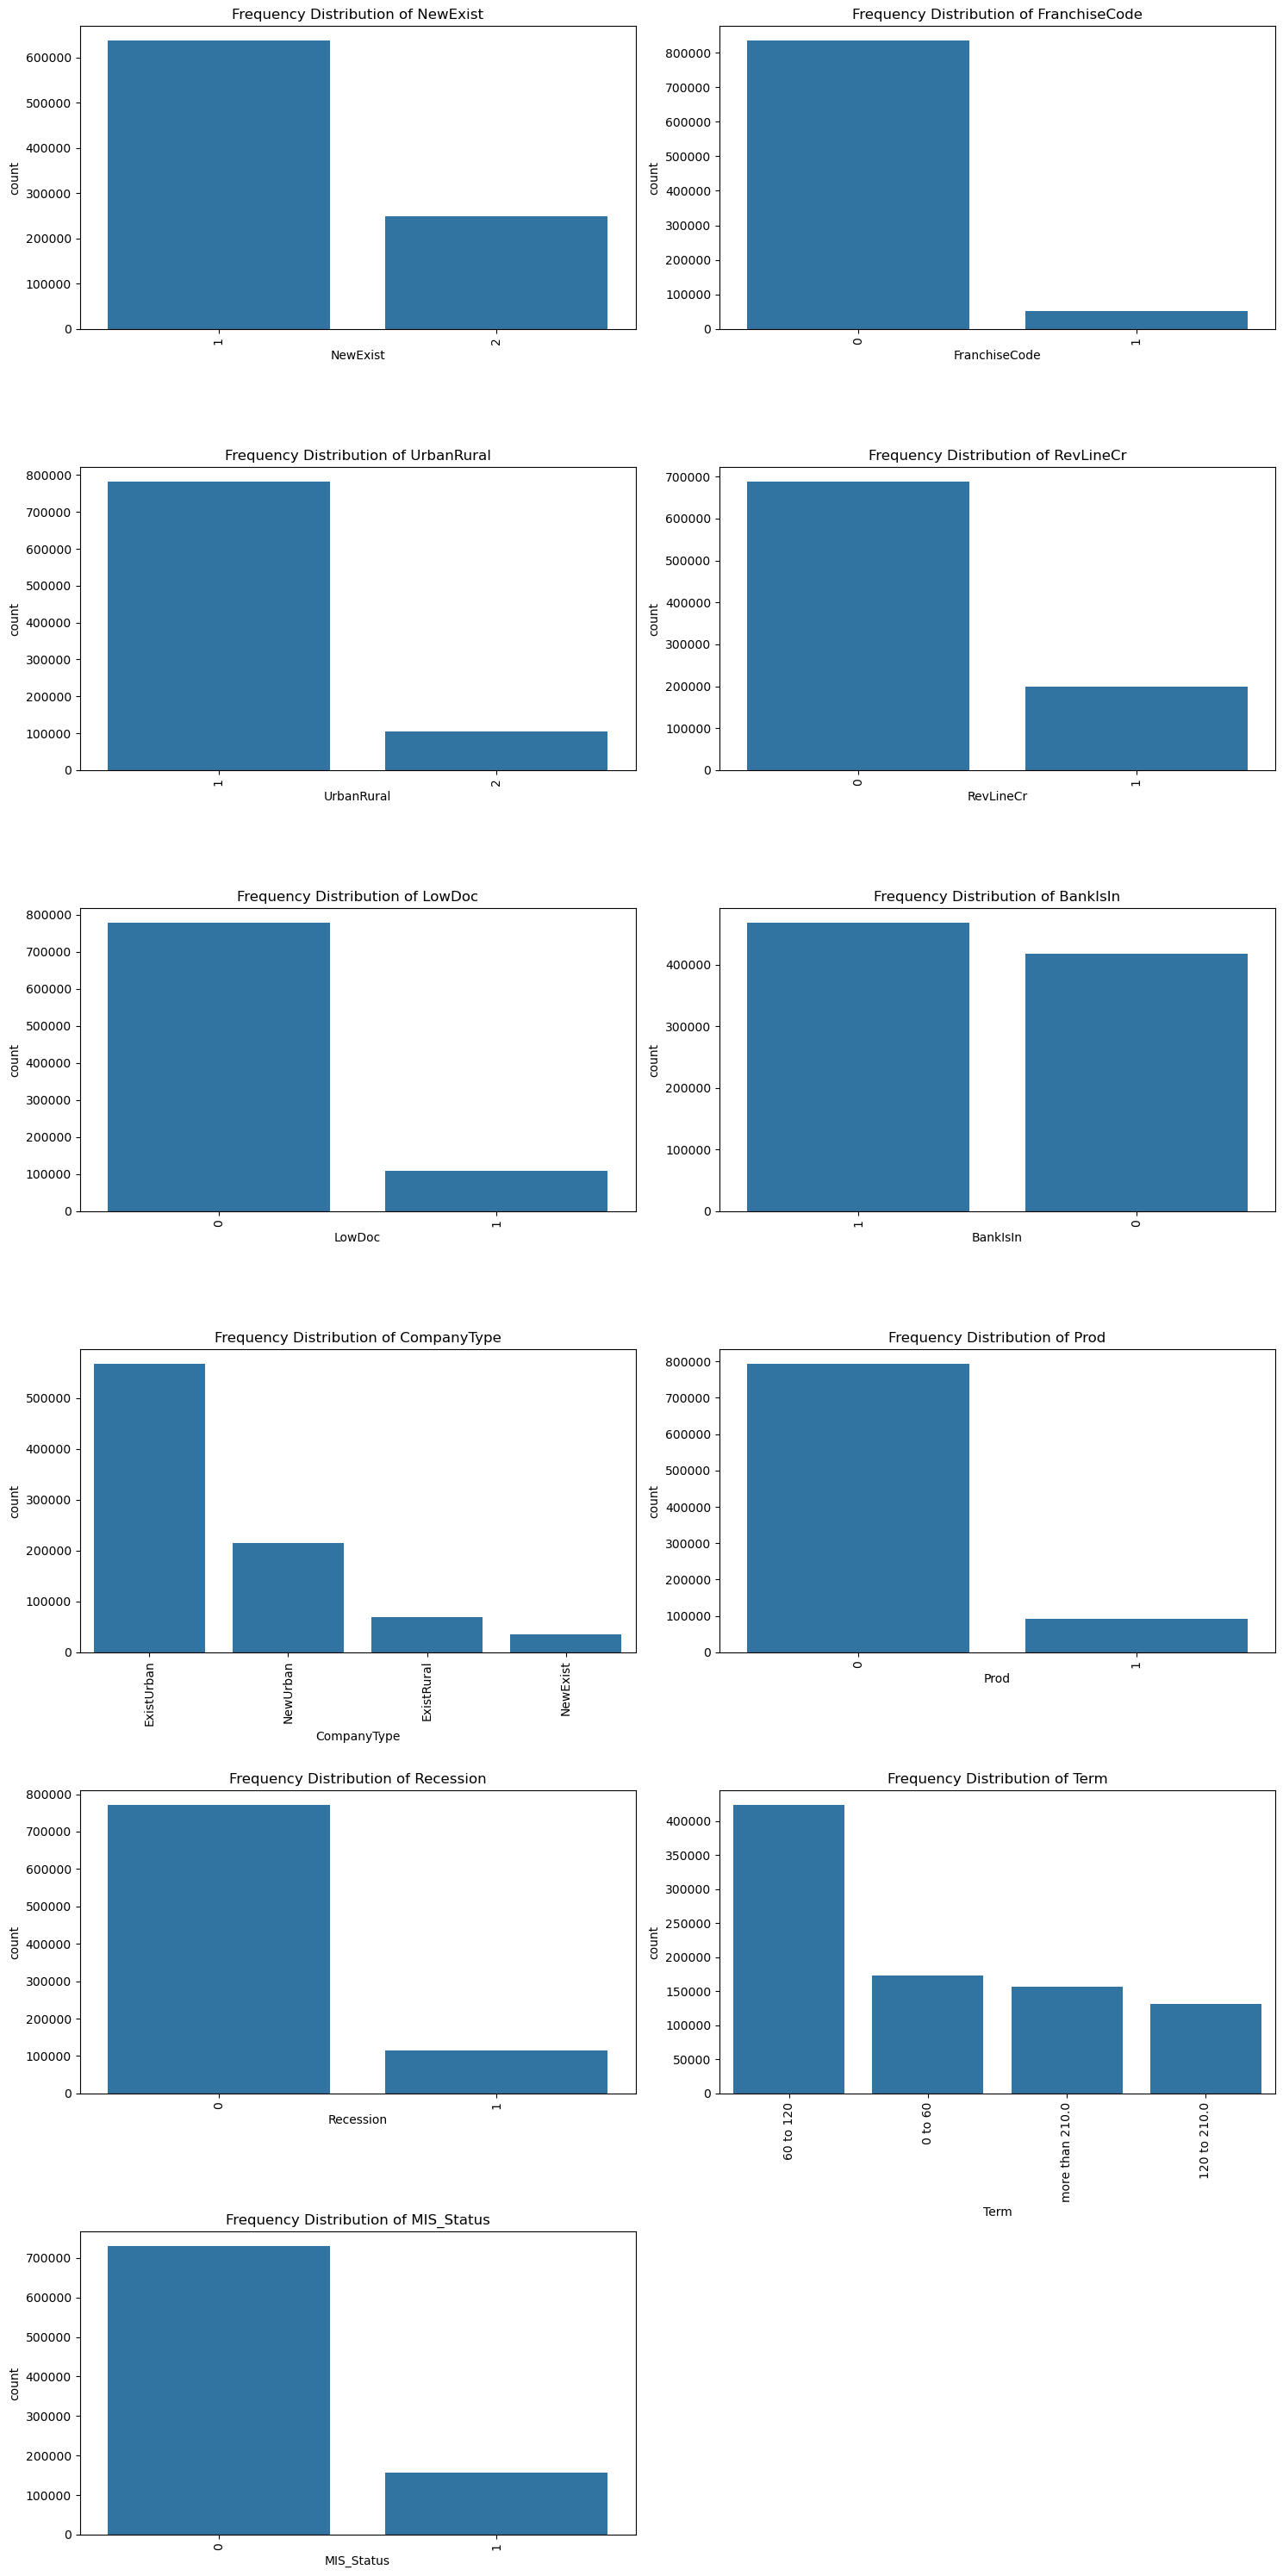

In [ ]:
# subplots
fig, axes = plt.subplots(6,2, figsize=(15,30))
fig.subplots_adjust(hspace=0.5)
axes = axes.flatten()

# Loop through each categorical columns
for i, (column, ax) in enumerate(zip(cats1, axes)):
    order = df[column].value_counts().index
    sns.countplot(x=column, data=df, ax=ax, order=order)
    ax.set_title(f'Frequency Distribution of {column}')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Remove empty subplots
for i in range(len(cats1), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**NewExist**
> Jumlah bisnis yang menerima pinjaman dalam dataset didominasi oleh bisnis yang sudah existing (label 1) dibandingkan dengan bisnis baru (label 2)

> Bisnis existing umumnya memiliki laporan keuangan yang lebih stabil dan menguntungkan, serta menunjukkan kemampuan mereka untuk melunasi pinjaman dibandingkan dengan bisnis baru yang mungkin belum memiliki riwayat kredit (credit score) yang memadai, dan belum memiliki laporan keuangan yang stabil sehingga lebih sulit mendapat pinjaman.

**FranchiseCode**
> Sebagian besar bisnis yang menerima pinjaman adalah bisnis independen atau bukan bagian dari franchise.

> Bisnis independen cenderung memiliki akses terbatas terhadap modal dibandingkan dengan bisnis franchise. Bisnis independen sering kali tidak memiliki dukungan finansial yang kuat karena dimiliki oleh individual dan jaringan terbatas, sehingga mereka lebih bergantung pada pinjaman eksternal untuk mendanai operasional dan ekspansi bisnis.

**UrbanRural**
> Data menunjukkan bahwa sebagian besar pinjaman diberikan kepada bisnis di daerah perkotaan. Ini mungkin disebabkan oleh beberapa faktor:

>> Konsentrasi bisnis yang lebih tinggi di daerah perkotaan, .</br>
Akses yang lebih mudah ke layanan perbankan dan keuangan di daerah perkotaan.</br>
Potensi pasar yang lebih besar di daerah perkotaan, karena mobilisasi penduduk yang tinggi dan populasi penduduk yang lebih padat.

> Meskipun jumlahnya lebih sedikit, ada sejumlah signifikan pinjaman yang diberikan di daerah pedesaan. Ini menunjukkan bahwa ada kebutuhan akan dukungan finansial di daerah pedesaan, meskipun aksesnya mungkin lebih terbatas dibandingkan dengan daerah perkotaan.

**RevLineCr**
> Data menunjukkan bahwa sebagian besar pinjaman diberikan tanpa revolving line of credit, karena banyak bisnis yang lebih memilih pinjaman yang memiliki jadwal pembayaran dengan nominal yang jelas/ tetap dan bunga yang pasti. Pinjaman dengan struktur ini memberikan kepastian bagi bisnis dalam perencanaan keuangan mereka, karena mereka tahu persis berapa yang harus dibayar setiap bulan dan kapan pinjaman tersebut akan lunas. Tidak seperti kartu kredit yang fleksibel dan dapat dibayar sebagian atau seluruh pinjaman sebelum jatuh tempo perbulan.

**LowDoc**
> Grafik menunjukkan bahwa sebagian besar pinjaman diberikan tanpa menggunakan program LowDoc. Namun, ada juga kebutuhan signifikan akan jenis pinjaman ini, meskipun dalam jumlah yang lebih kecil.

**BankIsIn**
> Jumlah pinjaman, dimana bisnisnya berada pada state yang sama dengan Bank pemberi pinjamnannya terlihat tidak berbeda signifikan.

**CompanyType**
> Jumlah bisnis yang sudah ada dan berada di perkotaan paling tinggi, diikuti oleh bisnis baru dan ada di perkotaan. Sisanya adalah bisnis yang ada di pedesaan, baik yang sudah ada maupun baru.

**Prod**
> Sebagian besar data menunjukkan bahwa jumlah pekerjaan yang diciptakan (CreateJob) lebih besar daripada pekerjaan yang dipertahankan (RetainedJob), karena banyak bisnis yang sedang dalam fase ekspansi dan pertumbuhan. Ketika bisnis berkembang, mereka sering kali perlu menambah tenaga kerja baru untuk mendukung peningkatan produksi, layanan, atau operasional lainnya. Hal ini menyebabkan penciptaan lapangan kerja baru yang signifikan. Sebaliknya, pekerjaan yang dipertahankan biasanya mencerminkan upaya untuk menjaga stabilitas operasional yang sudah ada, dan tidak selalu menunjukkan penambahan tenaga kerja baru. Oleh karena itu, dalam periode pertumbuhan ekonomi atau bisnis yang aktif mengembangkan diri, penciptaan lapangan kerja baru cenderung lebih tinggi dibandingkan dengan upaya mempertahankan pekerjaan yang sudah ada.

**MIS_Status**
> Setelah dilakukan class imbalance, persentase rasio CHGOFF dan PIF tidak berubah, yakni masing-masing masih sekitar 18% dan 72% dari total dataset.

**Term**
> Term dikelompokkan menjadi 4 bagian (0-60 bulan, 60-120 bulan, 120-Upper IQR, dan > Upper IQR). Terlihat bahwa banyak pinjaman pada term antara 5 sampai 10 tahun.

**Recession**
> Pada fitur ini lebih banyak pinjaman terdapat pada tahun-tahun tidak resesi dibanding tahun-tahun resesi.

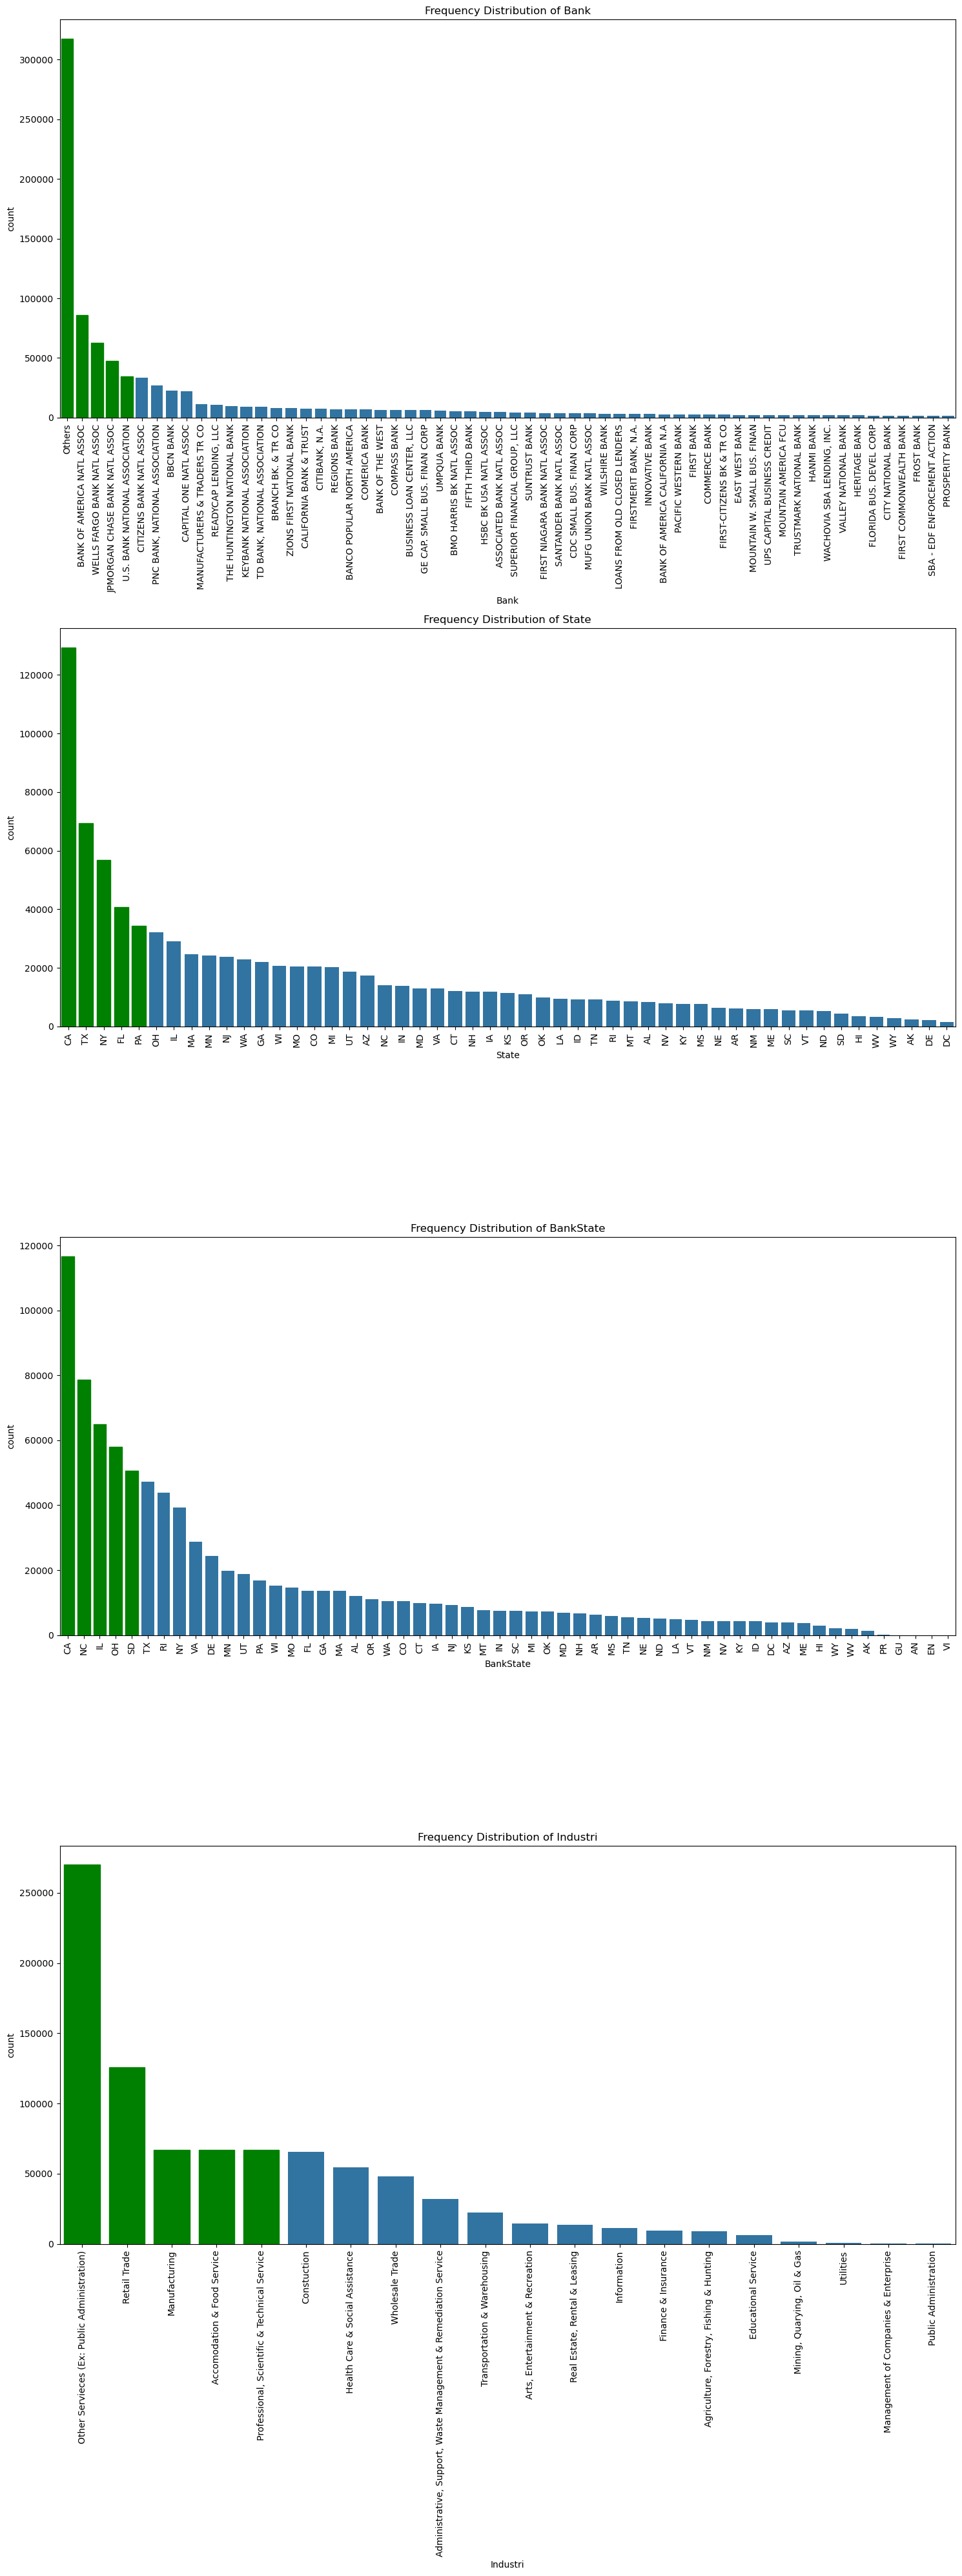

In [ ]:
# subplots
fig, axes = plt.subplots(4,1, figsize=(15,40))
fig.subplots_adjust(hspace=0.5)
axes = axes.flatten()

# Loop through each categorical columns
for i, (column, ax) in enumerate(zip(cats2, axes)):
    # Get the value counts and their order
    value_counts = df[column].value_counts()
    order = value_counts.index

    # Plot the countplot
    sns.countplot(x=column, data=df, ax=ax, order=order)

    # Set the title and rotate x-axis labels
    ax.set_title(f'Frequency Distribution of {column}')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    # Get the top 5 highest values
    top_5_values = value_counts.nlargest(5)

    # Highlight the top 5 highest values in green
    for patch in ax.patches:
        if patch.get_height() in top_5_values.values:
            patch.set_color('green')

# Remove empty subplots
for i in range(len(cats2), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**Bank**
> Kategori di kolom ini yang paling banyak kuantitasnya adalah Others. Ini karena bank yang hanya muncul < 1500 dimasukkan ke dalam kategori ini dan bank dengan karakteristik seperti ini ternyata banyak. Bank yang paling dipakai untuk meminjam ke SBA adalah Bank of America, Wells Fargo, JP Morgan, US Bank National of Association, dan Citizens Bank National Association.

**State**
> Dari total 50 state di USA, peminjam paling banyak ada pada state California, Texas, New York, Florida, dan Philadelphia. Untuk fokus implementasi program improvement kepada customer, SBA bisa fokus kepada customer di 5 state ini.

**BankState**
> Dari total 50 state di USA, bank peminjam paling banyak ada pada state California, North Carolina, Illinois, Ohio, dan Rhode Island. Untuk fokus implementasi program improvement kepada bank, SBA bisa fokus kepada bank ke 5 state ini.

**Industri**
> Frekuensi distribusi industri tertinggi di bidang Other Services karena banyak yang nilai awalnya 0 dimasukkan ke kategori ini. Nilai awal 0 menandakan perusahaan tidak diberikan label NAICS, yaitu tipikal pinjaman sebelum NAICS berdiri tahun 1997.

> Setelah itu, 3 sektor teratas adalah Retail, Manufacturing dan Accomodation & Food Services, mencerminkan pentingnya ketiga industri ini dalam perekonomian.

> Selanjutnya, sektor construction, healthcare dan social assistance juga menunjukan aktivitas yang signifikan dalam memperoleh pinjaman.

> Sektor lainnya: Wholesale Trade, Administrative Support, Transportation & Warehousing, dan sektor lainnya menunjukkan aktivitas yang lebih rendah tetapi tetap signifikan.

### 2. Univariate Analysis untuk Kolom Numerikal

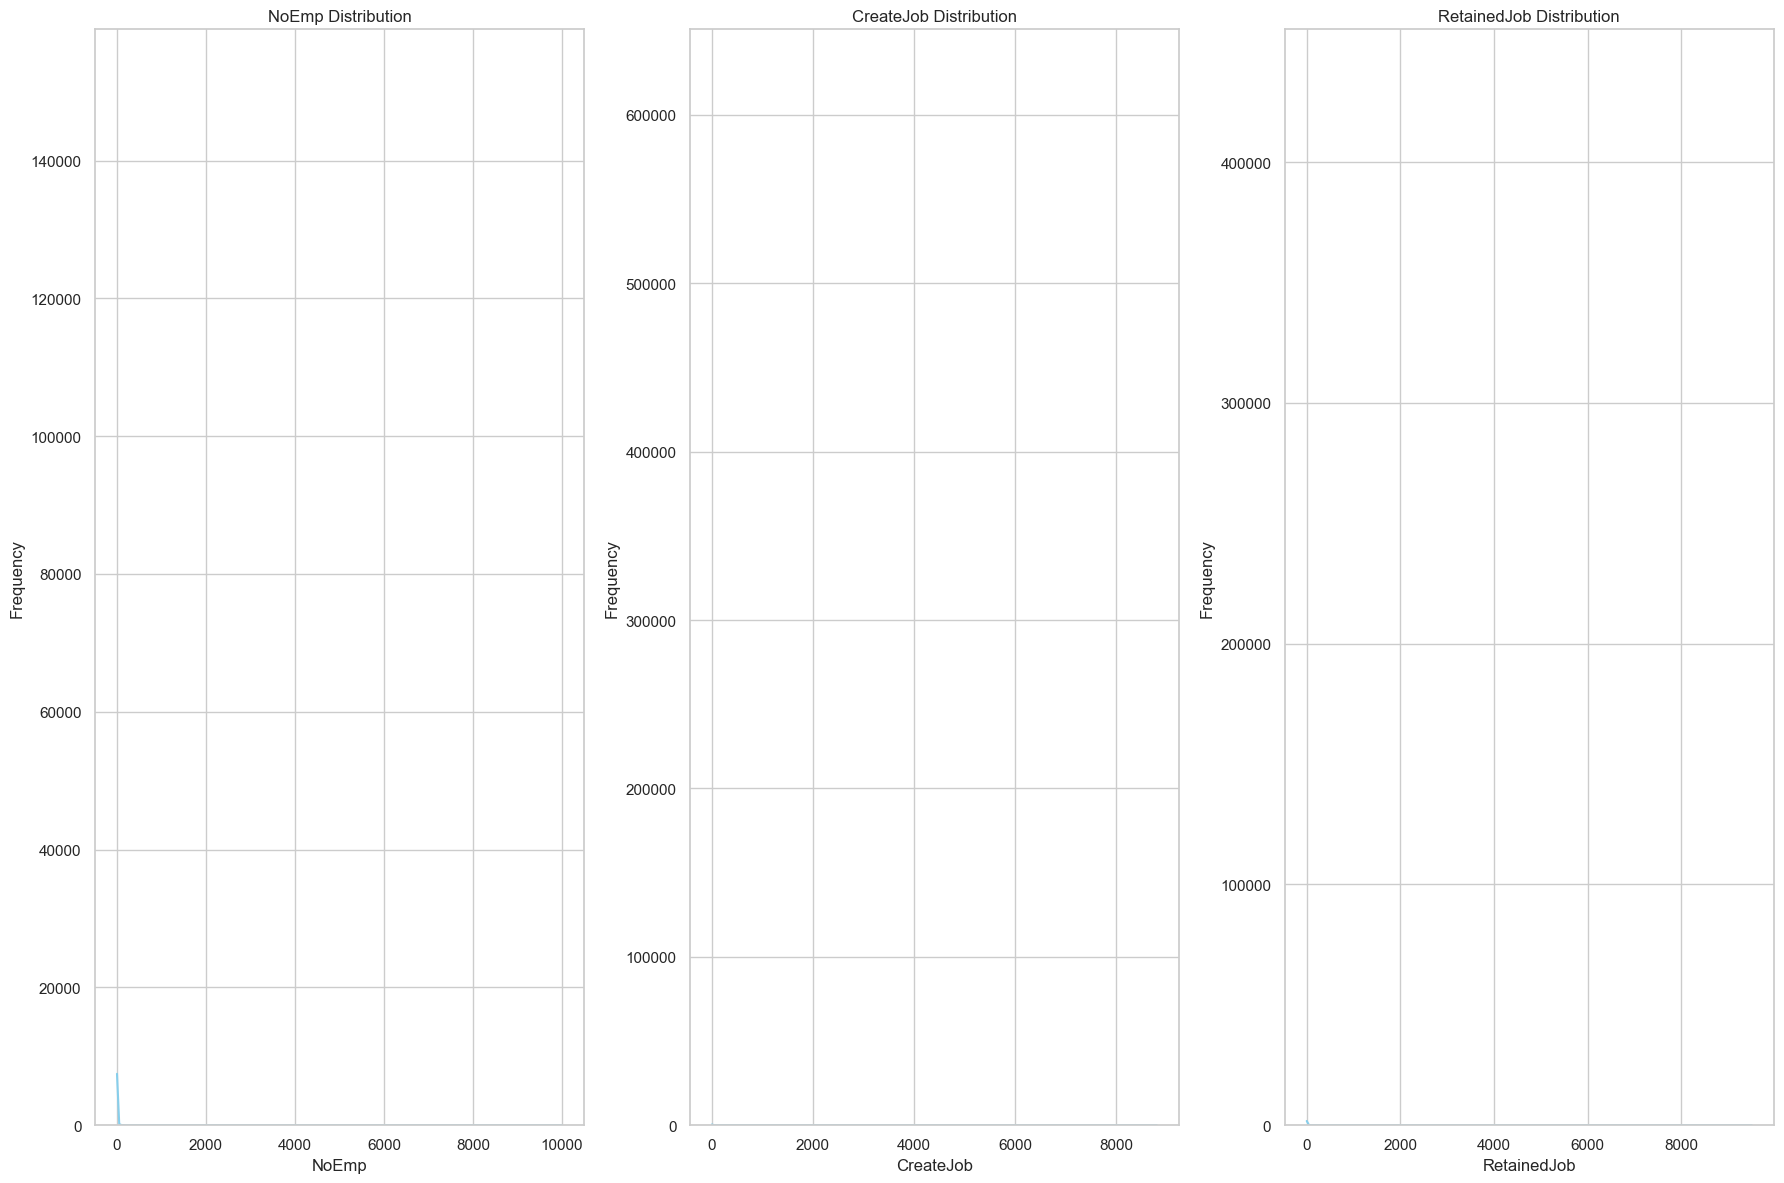

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 12))
axes = axes.flatten()

# Loop through each numerical column
for i, column in enumerate(nums):
        # For other numerical columns, use distplot or histplot
        sns.histplot(data=df, x=column, kde=True, color='skyblue', edgecolor='lightblue', ax=axes[i])
        axes[i].set_title(f'{column} Distribution')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')

# Remove empty subplots
for i in range(len(nums), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**NoEmp**
> Setelah ditransform dengan robust scaler karena distribusi awal kolom ini positive skew dan di-handle outlier dengan metode Z-score, kolom ini masih memiliki distribusi yang kurang lebih positive skew. Hanya saja ada perubahan limit maksimumnya yang menjadi hanya 29. Perusahaan peminjam memiliki karyawan yang

**CreateJob**
> Setelah ditransform dengan robust scaler karena distribusi awal kolom ini positive skew dan di-handle outlier dengan metode Z-score, kolom ini masih memiliki distribusi yang kurang lebih positive skew. Hanya saja ada perubahan limit maksimumnya yang menjadi hanya 600.

**RetainedJob**
> Setelah ditransform dengan robust scaler karena distribusi awal kolom ini positive skew dan di-handle outlier dengan metode Z-score, kolom ini masih memiliki distribusi yang kurang lebih positive skew. Hanya saja ada perubahan limit maksimumnya yang menjadi hanya 150.

## B. Multivariate Analysis

### 1. Multivariate Analysis untuk Kolom Kategorikal

IndexError: index 10 is out of bounds for axis 0 with size 10

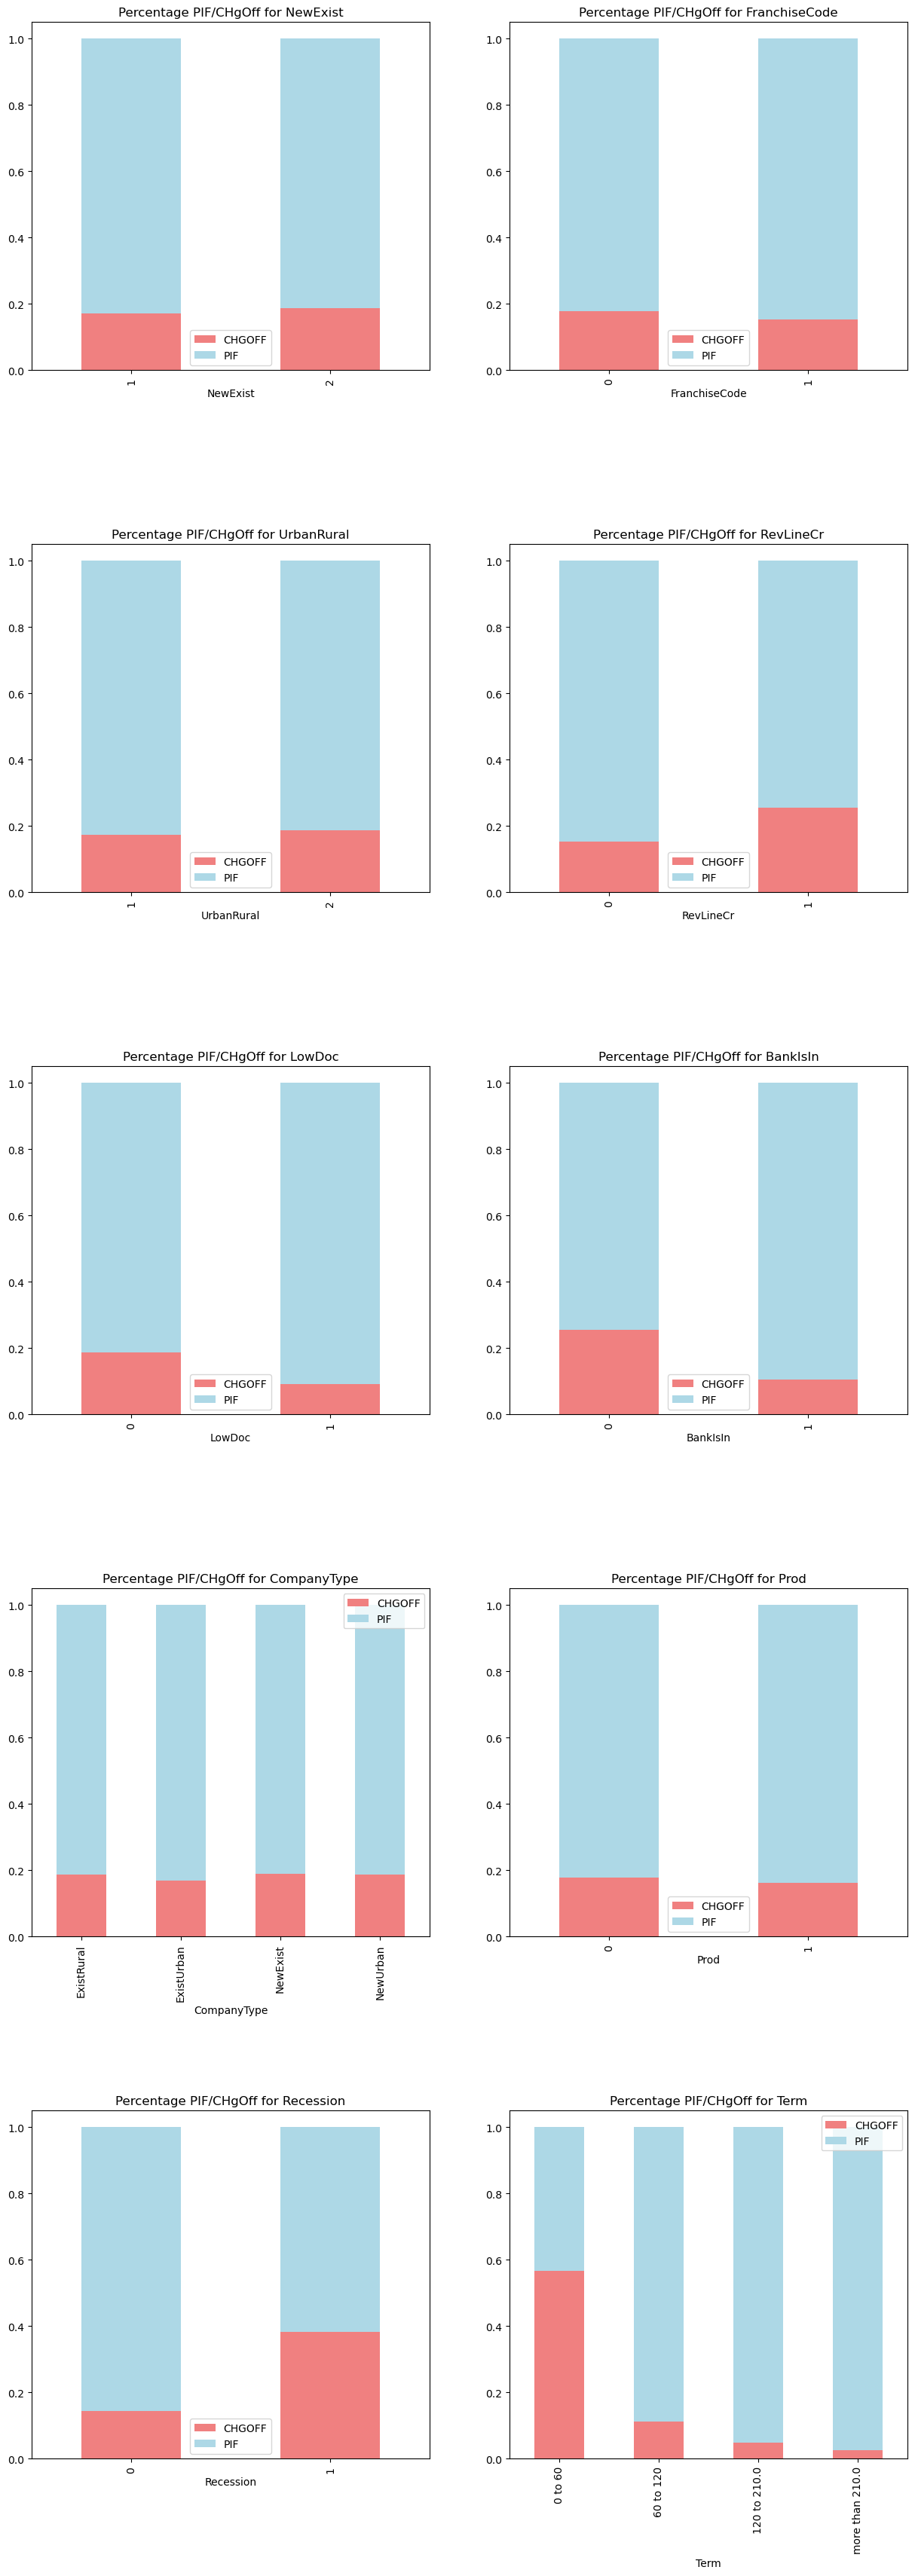

In [ ]:
# Subplots
fig, axes = plt.subplots(5, 2, figsize=(15, 42))
fig.subplots_adjust(hspace=0.5)
axes = axes.flatten()

for i, col in enumerate(cats1):
    # Create a subplot for each categorical variable
    ax = axes[i]

    # Group by the current column and calculate normalized value counts
    count_data = df.groupby(col)['MIS_Status'].value_counts(normalize=True).unstack('MIS_Status')

    count_data = count_data[[1, 0]]
    # Plot the normalized value counts
    count_data.plot(kind='bar', stacked=True, color=['lightcoral','lightblue'], ax=ax)

    # Set title and legend
    ax.set_title(f'Percentage PIF/CHgOff for {col}')
    ax.legend(labels=('CHGOFF','PIF'))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Remove empty subplots
for i in range(len(cats1), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**NewExist, FranchiseCode, UrbanRural, CompanyType, Prod**
> Tidak ada perbedaan rasio antara peminjam gagal bayar dengan tidak gagal bayar pada kolom ``NewExist``, ``FranchiseCode``, ``UrbanRural``, ``CompanyType``, dan ``Prod``. Dari bar chart terlihat bahwa fitur-fitur ini tidak terlalu signifikan perbedaannya terhadap fitur target ``MIS_Status``, namun masih harus dicek ulang dengan chi-square test apakah secara statistik observasi ini valid.

**RevLineCr, LowDoc, BankIsIn, Recession, Term**
> Pada bar chart terlihat perbedaan rasio antara peminjam gagal bayar dengan tidak gagal bayar pada kolom ``RevLineCr``, ``LowDoc``, ``BankIsIn``, ``Recession``, dan ``Term``. Dari bar chart terlihat bahwa fitur-fitur ini lumayan signifikan perbedaannya terhadap fitur target ``MIS_Status``, namun masih harus dicek ulang dengan chi-square test apakah secara statistik observasi ini valid.

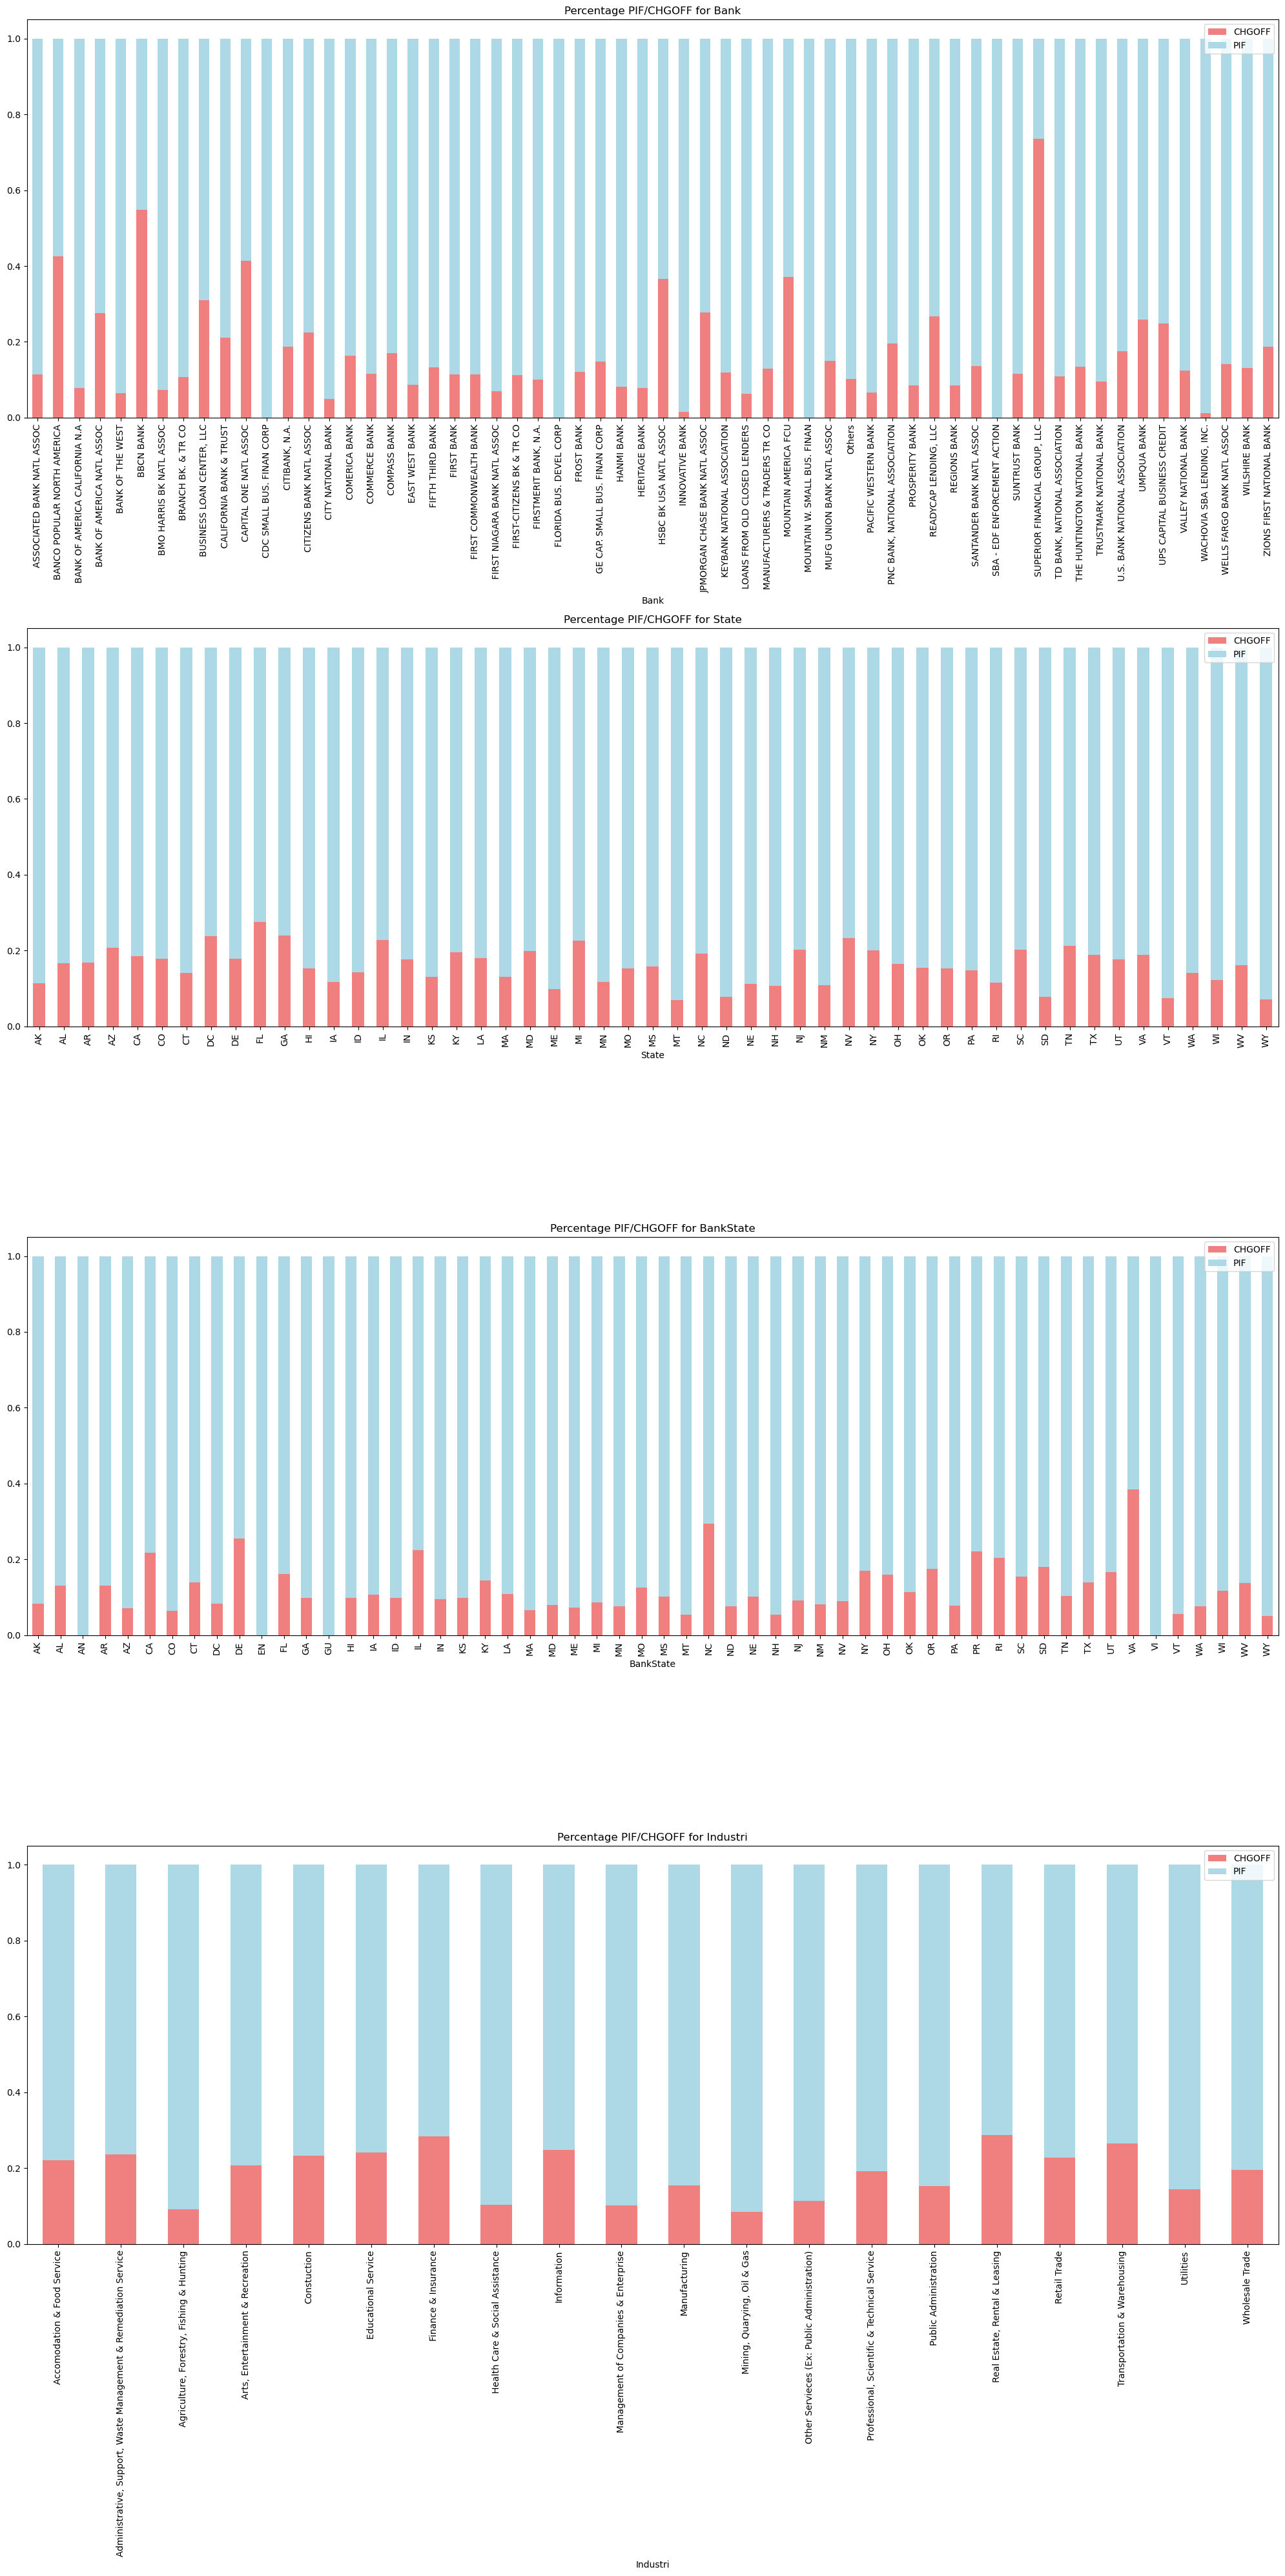

In [ ]:
# Subplots
fig, axes = plt.subplots(4, 1, figsize=(20, 40))
fig.subplots_adjust(hspace=0.5)
axes = axes.flatten()

# Define the color mapping for the statuses
color_map = {1: 'lightcoral', 0: 'lightblue'}

for i, col in enumerate(cats2):
    # Create a subplot for each categorical variable
    ax = axes[i]

    # Group by the current column and calculate normalized value counts
    count_data = df.groupby(col)['MIS_Status'].value_counts(normalize=True).unstack('MIS_Status')

    # Reorder columns to ensure CHGOFF is always first
    count_data = count_data[[1, 0]]

    # Plot the data with specified colors
    count_data.plot(kind='bar', stacked=True, color=[color_map[1], color_map[0]], ax=ax)

    # Set title and legend
    ax.set_title(f'Percentage PIF/CHGOFF for {col}')
    ax.legend(labels=('CHGOFF', 'PIF'))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Remove empty subplots
for i in range(len(cats2), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**Bank**
> Seperti yang sudah diperlihatkan di heatmap, korelasi bank terhadap MIS_Status termasuk yang paling besar. Ada beberapa bank yang bahkan tidak memiliki kadar kredit gagal bayar seperti pada bank SBA - EDF Enforcement Action, Florida Business Development Action, dan CDC Small Business Finance Corporation. Disarankan untuk SBA agar jika ingin menyalurkan pinjaman dengan risiko gagal bayar rendah bisa ke bank bebas CHGOFF atau rendah CHGOFF.

**State & BankState**
> Kita bisa melihat grafik ini dengan dua cara: hindari kategori dengan CHGOFF tinggi dan berikan pinjaman pada CHGOFF rendah atau tidak ada. Pada grafik State hindari CHGOFF tinggi pada State 9, 10, dan 33. Lalu pada grafik BankState hindari CHGOFF tinggi pada BankState 5, 30, dan 49. Untuk memberikan pinjaman akan lebih baik ke State dengan CHGOFF rendah seperti pada State 26, 41, dan 47. Pada grafik BankState SBA bisa memberikan ke bank pada state yang bahkan tidak ada CHGOFF-nya seperti pada 2, 10, 50.

**Industri**
> Kita bisa melihat bahwa tidak ada perbedaan rasio CHGOFF berarti pada tiap-tiap industri.

#### 1A Multivariate Analysis dengan Chi-Square Test

In [ ]:
from scipy.stats import chi2_contingency

# Inisialisasi DataFrame untuk menyimpan hasil uji chi-square
chi2_results = pd.DataFrame(index=cats, columns=cats)
p_values = pd.DataFrame(index=cats, columns=cats)

# Melakukan uji chi-square untuk setiap pasangan variabel
for feature1 in cats:
    for feature2 in cats:
        # Membuat tabel kontingensi
        contingency_table = pd.crosstab(df[feature1], df[feature2])

        # Melakukan uji chi-square
        chi2, p, _, _ = chi2_contingency(contingency_table)

        # Menyimpan nilai p-value dan statistik Chi-Square dalam DataFrame
        chi2_results.at[feature1, feature2] = chi2
        p_values.at[feature1, feature2] = p

# Menampilkan hasil uji chi-square
print("Hasil Uji Chi-Square (Statistik Chi-Square):")
print(chi2_results)

# Menampilkan nilai p-value
print("\nNilai P-Value:")
print(p_values)

Hasil Uji Chi-Square (Statistik Chi-Square):
                    NewExist  FranchiseCode     UrbanRural      RevLineCr  \
NewExist       886235.051031    18038.60061    1485.023821     6081.85632   
FranchiseCode    18038.60061  886221.630416       1.823575    8725.945685   
UrbanRural       1485.023821       1.823575  886230.351569      838.89947   
RevLineCr         6081.85632    8725.945685      838.89947  886234.241887   
LowDoc          23407.969714     716.025984     344.367239   35238.666545   
BankIsIn         1151.589176      36.935086    3776.701077   55521.546027   
CompanyType         886240.0   18370.793273       886240.0    7274.443939   
Prod            13816.730627    5133.685849     879.740645    5350.142777   
Recession        1574.095207     799.142466    4276.174237   33575.740446   
Term            12248.280801    6490.962069    1660.556128  133722.858204   
MIS_Status        319.231465      210.17933     114.449485   11219.541695   
Bank            27638.832774   

Karena p-value semua fitur terhadap fitur ``MIS_Status`` adalah 0 (kurang dari nilai alpha = 0.05), maka bisa dibilang semua fitur kategorikal yang kami pilih memiliki pengaruh statistik yang signifikan terhadap fitur target ``MIS_Status``

### 2. Multivariate Analysis untuk Kolom Numerikal

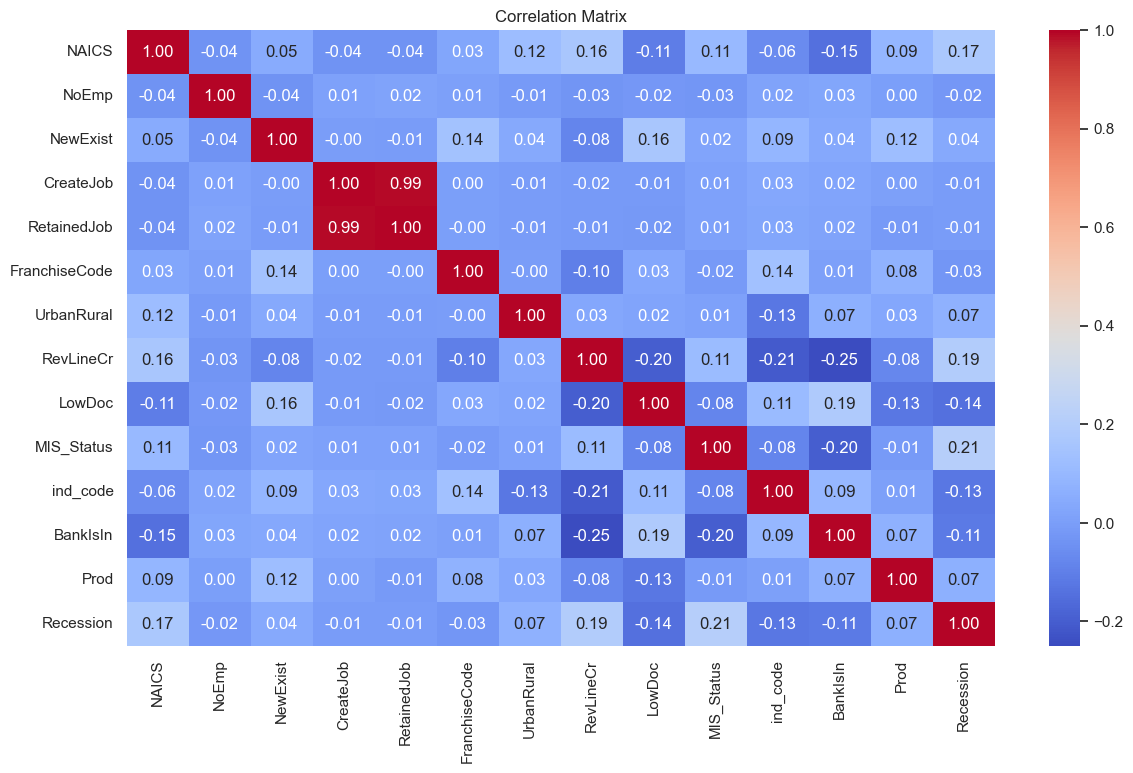

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(14, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Pada matriks korelasi dapat dilihat bahwa urutan korelasi absolut paling besar dari 13 kolom lain yang bisa dikorelasi jika diurutkan adalah:

1. ``Recession`` (0.21)
2. ``BankIsIn`` (0.20)
3. ``NAICS`` (0.11)
4. ``RevLineCr`` (0.11)
5. ``LowDoc`` (0.08)
6. ``ind_code`` (0.08)
7. ``NoEmp`` (0.03)
8. ``FranchiseCode`` (0.02)
9. ``NewExist`` (0.02)
10. ``CreateJob`` (0.01)
11. ``RetainedJob`` (0.01)
12. ``UrbanRural`` (0.01)
13. ``Prod`` (0.01)

Dengan ini dapat dilihat bahwa 5 faktor teratas yang sangat berkaitan dengan MIS_Status sebelum dilakukan handle outlier dan class imbalance adalah: ``Recession``, ``BankIsIn``, ``NAICS``, ``RevLineCr``, dan ``LowDoc``. Urutan list ini akan berubah jika dilakukan handle outlier dan class imbalance. Pada beberapa kolom numerikal yang akan selanjutnya dilakukan handle outlier seperti ``NoEmp``, ``CreateJob``, dan ``RetainedJob``, akan dilakukan t-test untuk melihat lebih dalam lagi signifikansi perbedaan rata-rata tiap kolom terhadap fitur target ``MIS_Status``. Untuk beberapa kolom yang juga merupakan kategorikal seperti ``Recession``, ``BankIsIn``, ``NAICS``, ``RevLineCr``, ``LowDoc``, ``FranchiseCode``, ``NewExist``, ``UrbanRural``, perbedaan statistik juga sebelumnya sudah dilihat berdasarkan chi-square test


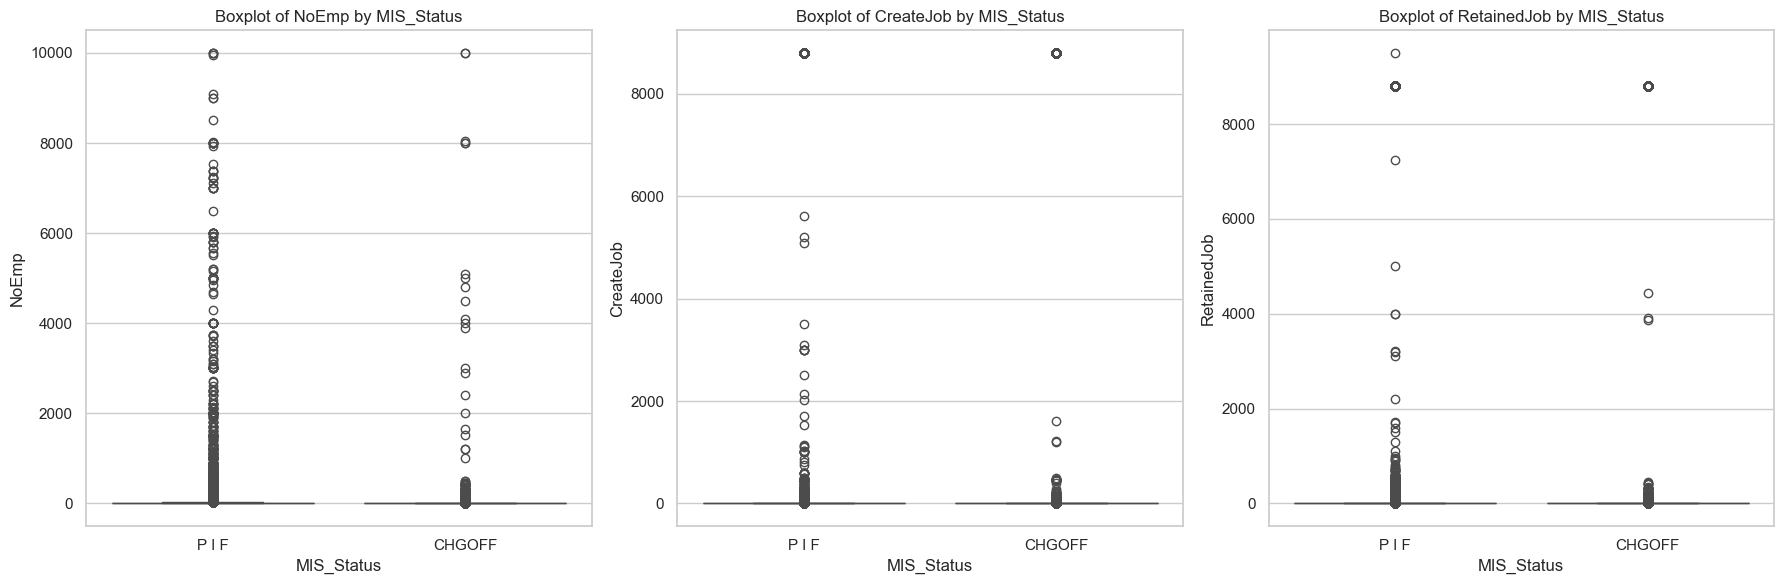

In [ ]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define the columns to plot
columns_to_plot = ['NoEmp', 'CreateJob', 'RetainedJob']

# Create boxplots for each column with sub-categories from MIS_Status
for ax, column in zip(axes, columns_to_plot):
    sns.boxplot(x='MIS_Status', y=column, data=df, ax=ax)
    ax.set_title(f'Boxplot of {column} by MIS_Status')

# Adjust the layout
plt.tight_layout()
plt.show()

Pada boxplot di atas dapat dilihat bahwa rata-rata semua distribusi PIF dan CHGOFF pada kolom numerikal ``NoEmp``, ``CreateJob``, dan ``RetainedJob`` memiliki skewness yang positif, yakni banyak frekuensi pada jumlah rendah. Outliers pada PIF terlihat lebih banyak dibandingkan outliers pada CHGOFF. Untuk melihat apakah perbedaan distribusi ``MIS_Status`` pada ketiga fitur ini signifikan, akan dilakukan uji statistik t-test.

#### 2A Multivariate Analysis dengan T-Test

In [ ]:
from scipy.stats import ttest_ind

# List of columns to test
columns_to_test = ['NoEmp', 'CreateJob', 'RetainedJob']

# Perform t-tests and display results
alpha = 0.05

for column in columns_to_test:
    group1 = df[df['MIS_Status'] == 1][column]
    group2 = df[df['MIS_Status'] == 0][column]

    t_statistic, p_value = ttest_ind(group1, group2)

    # Display results
    print(f"T-Statistic: {column} vs MIS_Status", t_statistic)
    print(f"P-Value: {column} vs MIS_Status", p_value)
    if p_value < alpha:
        print("Terdapat perbedaan signifikan antara kedua kelompok.")
    else:
        print("Tidak terdapat perbedaan signifikan antara kedua kelompok.")
    print("\n")  # Add a new line for better readability between results

T-Statistic: NoEmp vs MIS_Status -24.583219960126762
P-Value: NoEmp vs MIS_Status 2.117595904213999e-133
Terdapat perbedaan signifikan antara kedua kelompok.


T-Statistic: CreateJob vs MIS_Status 11.16843344410559
P-Value: CreateJob vs MIS_Status 5.845828983821273e-29
Terdapat perbedaan signifikan antara kedua kelompok.


T-Statistic: RetainedJob vs MIS_Status 11.605513045638158
P-Value: RetainedJob vs MIS_Status 3.8837484031954626e-31
Terdapat perbedaan signifikan antara kedua kelompok.




P-value pada t-test antara fitur ``MIS_Status`` dengan fitur-fitur numerik menandakan adanya perbedaan signifikan. Ini berarti rata-rata jumlah karyawan ``NoEmp``, jumlah terbentuknya pekerjaan baru ``CreateJob``, dan jumlah pekerjaan tetap ``RetainedJob`` memiliki perbedaan signifikan antara kategori yang kreditnya dibayar lunas ``P I F`` dengan kredit yang tidak dibayar lunas ``CHGOFF``. Maka dari itu ke depannya SBA bisa melihat ke fitur-fitur ini untuk membedakan klien yang baik untuk diberikan pinjaman atau tidak.

# **Stage 1B - Feature Transformation**

## D. Feature Encoding

1. Kolom ``NAICS`` akan dilakukan ``label encoding``
2. Melakukan label encoding terhadap kolom ``bank`` dengan frekuensi kemunculan 60 teratas
3. Melakukan label encoding terhadap kolom ``State``
4. Melakukan label encoding terhadap kolom ``BankState``

### 1. NAICS akan dilakukan label encoding

In [ ]:
# Melakukan label encoding
label_encode = ['Industri']
label_encoder = LabelEncoder()
df[label_encode] =df[label_encode].apply(LabelEncoder().fit_transform)

Hasil label encoding adalah sebagai berikut

In [ ]:
df['Industri'].value_counts()

Industri
12    270021
16    125762
10     67109
0      67084
13     66951
4      65635
7      54633
19     48148
1      32114
17     22135
3      14460
15     13457
8      11220
6       9378
2       8868
5       6313
11      1820
18       654
9        256
14       222
Name: count, dtype: int64

### 2. Melakukan label encoding terhadap kolom bank dengan frekuensi kemunculan 60 teratas

In [ ]:
label_encode_bank = ['Bank']
label_encoder = LabelEncoder()
df[label_encode_bank] =df[label_encode_bank].apply(LabelEncoder().fit_transform)

Hasil label encoding adalah sebagai berikut

In [ ]:
df['Bank'].value_counts()

Bank
39    317633
3      86075
57     62934
32     47460
52     34752
13     33569
41     27148
5      22814
10     22220
35     11150
43     10616
50      9520
33      9186
49      8901
7       8028
59      7897
9       7476
12      7402
44      7143
1       7135
15      6991
4       6628
17      6384
8       6262
27      6184
53      6000
6       5154
19      5144
30      4771
0       4625
48      4272
47      4037
22      3930
45      3900
11      3763
38      3732
58      3449
34      3313
24      3278
31      3084
2       2827
40      2800
20      2788
16      2653
23      2517
18      2302
37      2203
54      2155
36      2124
51      2057
28      2024
56      1950
55      1903
29      1902
25      1771
14      1728
21      1695
26      1688
46      1640
42      1553
Name: count, dtype: int64

### 3. Melakukan label encoding terhadap kolom State

In [ ]:
label_encode_state = ['State']
label_encoder = LabelEncoder()
df[label_encode_state] =df[label_encode_state].apply(LabelEncoder().fit_transform)

### 4. Melakukan label encoding terhadap kolom BankState

In [ ]:
label_encode_bank_state = ['BankState']
label_encoder = LabelEncoder()
df[label_encode_bank_state] =df[label_encode_bank_state].apply(LabelEncoder().fit_transform)

## E. Handle Outlier

Pada kolom numerikal outliers di-handle dengan cara sebagai berikut:
1. NoEmp, CreateJob, RetainedJob ``dilakukan robust-scaler``, untuk mempermudah dalam melakukan analisis statistik
2. Fitur yang sudah di-robust scaler akan menggunakan metode Z Score

### 1. NoEmp, CreateJob, RetainedJob dilakukan robust-scaler, untuk mempermudah dalam melakukan analisis statistik

In [ ]:
scaler = RobustScaler()
column_to_scale = ['NoEmp', 'CreateJob', 'RetainedJob']

In [ ]:
df[column_to_scale] = scaler.fit_transform(df[column_to_scale])

Hasil Output dari robust scaler adalah sebagai berikut, mengkonversi rentang nilai dari kolom yang sudah ditentukan diatas

In [ ]:
df[column_to_scale].describe()

,NoEmp,CreateJob,RetainedJob
count,886240.000000,886240.000000,886240.000000
mean,0.931244,8.463092,2.460602
std,9.273034,237.301746,59.434887
min,-0.375000,0.000000,-0.250000
25%,-0.250000,0.000000,-0.250000
50%,0.000000,0.000000,0.000000
75%,0.750000,1.000000,0.750000
max,1249.375000,8800.000000,2374.750000


### 2. Fitur yang sudah di-robust scaler akan di handle outliernya menggunakan metode Z Score

In [ ]:
target_zscore = ['NoEmp', 'CreateJob', 'RetainedJob']
df = df[(np.abs(zscore(df[target_zscore])) < 3).all(axis=1)]

In [ ]:
print("\n Data setelah menghapus outliers dengan Z Score pada kolom yang dilakukan robust scaler:")
print(df[target_zscore].describe())


 Data setelah menghapus outliers dengan Z Score pada kolom yang dilakukan robust scaler:
               NoEmp      CreateJob    RetainedJob
count  884139.000000  884139.000000  884139.000000
mean        0.748505       1.987352       0.814611
std         2.152710       8.468232       2.828473
min        -0.375000       0.000000      -0.250000
25%        -0.250000       0.000000      -0.250000
50%         0.000000       0.000000       0.000000
75%         0.750000       1.000000       0.750000
max        28.750000     600.000000     149.750000


## F. Class Imbalance

- Class Imbalance pada MIS_Status di-handle dengan oversampling SMOTE

In [ ]:
sm = SMOTE(random_state=42)

target = df['MIS_Status']
oversampler = RandomOverSampler(sampling_strategy="minority")
oversampled_data, oversampled_target = oversampler.fit_resample(df, target)

Jumlah data setelah dilakukan oversampling

In [ ]:
oversampled_target.value_counts()

MIS_Status
0    576105
1    576105
Name: count, dtype: int64

Melakukan pengecekan terhadap data duplikasi setelah dilakukannya oversampling

In [ ]:
oversampled_data.duplicated().value_counts()

False    727955
True     424255
Name: count, dtype: int64

Menghilangkan duplikasi

In [ ]:
oversampled_data_no_dup = oversampled_data.drop_duplicates()

In [ ]:
oversampled_data_no_dup.duplicated().value_counts()

False    727955
Name: count, dtype: int64